<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Decomposition

### Learning Objectives
 
**After this lesson, you will be able to:**
- Describe the different components of time series data (trend, seasonality, cycles, and residual).
- Decompose time series data into trend, seasonality, and residual components.
- Plot the decomposed components of a time series.

<h2><a id = "A">Time Series Decomposition</a></h2>

Splitting a time series into several components is useful for both understanding the data and diagnosing the appropriate forecasting model. Each of these components will represent an underlying pattern. 

- **Trend**: A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes, we will refer to a trend “changing direction” when, for example, it might go from an increasing trend to a decreasing trend.

- **Seasonal**: A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.

- **Residual**: The leftover or error component.

A time series can also have **cyclical** components that repeat at irregular intervals, such as what are often called "business cycles." Our decompositions will not have cyclical components.

### Guided Practice

We are going to play around with some bus data from Portland, Oregon. Load in the data set below and check it out.

In [1]:
import datetime
import dateutil

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
bus = pd.read_csv('../data/bus.csv')
bus.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [3]:
bus.tail()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,NaN,NaN
115,Portland Oregon average monthly bus ridership ...,n=114


We'll need to clean this data a little. Let's simplify the names of the columns. There are also a couple of bad rows at the end of the file. We'll get rid of those. Additionally, we need to make the `riders` column an integer. 

In [4]:
# Drop the last two rows
# /scrub/
bus.drop([114, 115], inplace=True)

In [5]:
# Change the column names to "month" and "riders"
# /scrub/
bus.columns= ['month','riders']

In [6]:
# Cast "riders" to int
# /scrub/
bus.loc[:, 'riders'] = bus.loc[:, 'riders'].apply(int)

In [7]:
bus.head()

,month,riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [8]:
bus.tail()

,month,riders
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [9]:
# Convert "month" to datetime and set it as an unnamed index
# /scrub/
bus.loc[:, 'month'] = pd.to_datetime(bus.loc[:, 'month'])
bus.set_index('month', inplace=True)
bus.index.name = None

bus.head() 

,riders
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


### Plot the raw data.

We can look at the raw data first. Let's plot the time series.

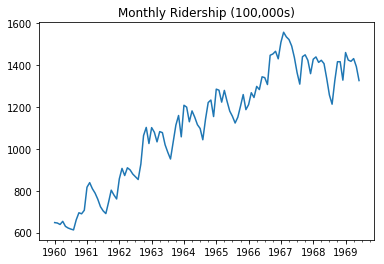

In [10]:
# /scrub/
fig, ax = plt.subplots()
bus.loc[:, 'riders'].plot()
ax.set_title('Monthly Ridership (100,000s)');

<h2><a id = "B">Decompose the time series and plot using the `.seasonal_decompose()` function.</a></h2>

Using the `seasonal_decompose()` function, we can break the time series into its constituent parts.

Use the function on the `riders` data with a frequency of `12`, then plot the data. We're using a frequency of 12 because the data are monthly.

The decomposition object from `seasonal_decompose()` has a `.plot()` function, like with Pandas DataFrames.

In [11]:
# Import seasonal_decompose
# /scrub/
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


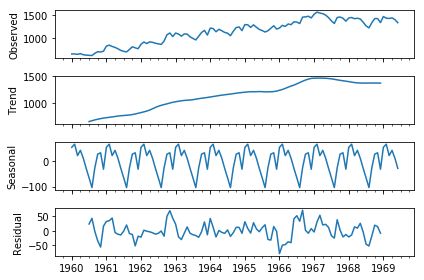

In [12]:
# Apply seasonal_decompose to the bus data and plot the result
# /scrub/
decomposition = seasonal_decompose(bus.loc[:, 'riders'], freq=12)
fig = decomposition.plot();

If you don't specify a frequency then `seasonal_decompose` will infer in. In this case, it seems clear that we should expect 12-month seasonality, so putting it in by hand makes sense.

### Plot a single component of the decomposition plot.

We can pull out just one component of the decomposition plot.

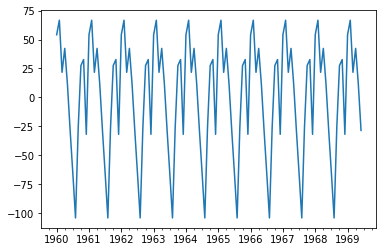

In [13]:
# Plot just the seasonal component
# /scrub/
fig, ax = plt.subplots()
decomposition.seasonal.plot(ax=ax);

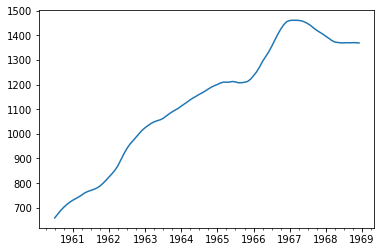

In [14]:
# Plot just the seasonal component
# /scrub/
fig, ax = plt.subplots()
decomposition.trend.plot(ax=ax);

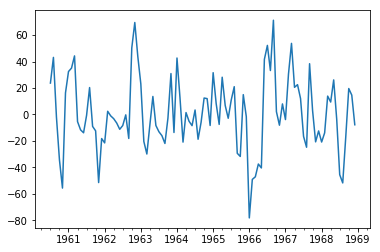

In [15]:
# Plot just the residuals
# /scrub/
fig, ax = plt.subplots()
decomposition.resid.plot(ax=ax);

<h2><a id = "C">Examining the residuals and their ACF and PACF.</a></h2>

Let's examine the residuals of our data.

In [16]:
# Import plot_acf and plot_pacf
# /scrub/
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

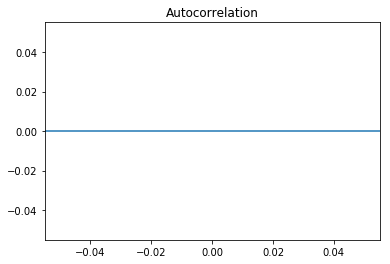

In [17]:
# Plot the ACF of the residuals
# /scrub/
fig, ax = plt.subplots()
plot_acf(decomposition.resid, lags=30, ax=ax);

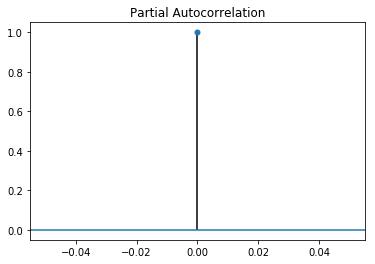

In [18]:
# Plot the PACF of the residuals
# /scrub/
fig, ax = plt.subplots()
plot_pacf(decomposition.resid, lags=30, ax=ax);

We notice that the residuals of our time series don't have significant autocorrelation. This is because the trend and seasonal components have been taken out and adjusted for. 

# Recap

* Trend is a long-term change in the data. 
* Seasonality is a pattern of a fixed period that repeats in the data. 
* Residuals are the error components of the data.
* StatsModels contains a `seasonal_decompose()` function that breaks a time series into its components.

**Exercise.**

In [19]:
airline = pd.read_csv('../data/airline.csv')
airline.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [20]:
airline.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


- Get rid of the last row

In [21]:
# /scrub/
airline.drop(airline.index[144], inplace=True)

- Rename the columns "month" and "passengers", respectively.

In [22]:
# /scrub/
airline.columns= ['month', 'passengers']

- Cast "passengers" to int

In [23]:
# /scrub/
airline.loc[:, 'passengers'] = airline.loc[:, 'passengers'].apply(int)

- Convert "month" to datetime.

In [24]:
# /scrub/
airline.loc[:, 'month'] = pd.to_datetime(airline.loc[:, 'month'])

- Make "month" the index, and drop its name.

In [25]:
# /scrub/
airline.set_index('month', inplace=True)
airline.index.name=None

airline.head() 

,passengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


- Make a lineplot of the number of passengers over time.

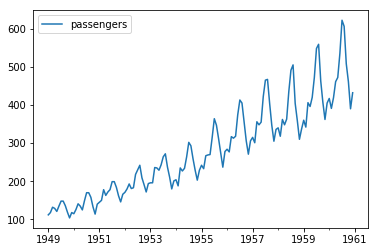

In [26]:
# /scrub/
fig, ax = plt.subplots()
airline.plot(ax=ax);

- Decompose the time series using the `.seasonal_decompose()` function with a seasonality frequency of 12, and plot the result.

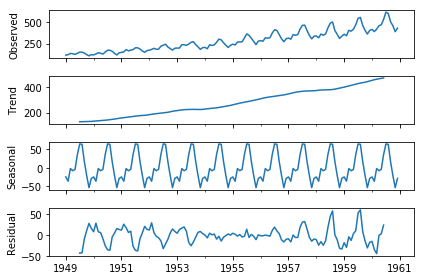

In [27]:
# /scrub/
decomposition = seasonal_decompose(airline.loc[:, 'passengers'], freq=12)
fig = decomposition.plot()

- Interpret these plots.

There is a clear upward trend in airline passengers and strong annual seasonality. 